# Decision Trees

* Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.
* They are very powerful algorithms, capable of fitting complex datasets.
* For example, in Chapter 2 you trained a DecisionTreeRegressor model on the california housing dataset, fitting it perfectly (actually overfitting it)
* Decision Trees are also Fundamental components of RandomForest, which are among the most powerful Machine Learning algorithms available today.

## What are we going to cover in this Notebook

1. We will start by discussing how to train, visualize, and make predictions with Decision Trees.
2. Then we will go through `CART` training algorithm used by scikit-learn, &
3. We will discuss how to regularize trees and use them for regression tasks.
4. Finally, we will discuss some of the limitations of Decision Trees.

# Training and Visualizing a Decision Tree

* To Understand Decision Trees, let's just build one and take a look at how it makes predictions
* The following code trains a DecisionTreeClassifer on the iris dataset 

In [2]:
# Import the required packages
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris() # Load the iris-dataset
X = iris.data[:,2:] # petal length & width
y = iris.target

In [10]:
print(f"Features:\n {X[:5]}\n Targert:\n {y[:5]}") # Print 5 records from X & y

Features:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
 Targert:
 [0 0 0 0 0]


In [13]:
tree_clf = DecisionTreeClassifier(max_depth=2) # Load the model with max_depth=3
tree_clf

DecisionTreeClassifier(max_depth=2)

In [14]:
tree_clf.fit(X, y) # Fit the model

DecisionTreeClassifier(max_depth=2)

### You can visualize the trained Decision Tree by first using the `export_graphviz()` method to output a graph defination file called iris_tree.dot

In [36]:
from sklearn.tree import export_graphviz # Import library for visualizing decision Tree

In [37]:
export_graphviz(tree_clf,
               out_file="iris_tree.dot")

#### Then we can convert this .dot file to a variety of formats such as PDF or PNG using the dot command-line tool from the graphviz package. This command line converts the .dot file to a .png image file

# Another way we can visualize is by using the tree

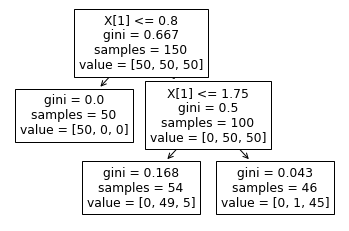

In [35]:
from sklearn import tree

tree.plot_tree(tree_clf);

# Making Predictions

* Let's see how the tree represented above makes predicitons.
* Suppose you find an iris flower and you want to claswsify it. You start at the root node (depth 0, at the top): this node asks whether the flower's petal length is smaller than 0.8 cm. If it is, then you move down to the root's child node (depth 1, left). In this case, it is a leaf node (i.e, it does not have any children nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the Decision Tree predicts that your flower in an value=[50,0,0]
* Now suppose you find another flower, but this time the petal length is greater than 0.8 cm. You must move down to the roots's right child node (depth 1, right), which is not a leaf node, so it asks another qustion: is the patal width smaller than 1.75 cm? If it is, then your flower is most likely anIrid-Versicolor (depth 2, left) value=[0,49,5]. If not, it is likely an Iris-Virginica (depth 2, right). It's really that simple.
> ##### One of the many qualities of Decision Tree is that they require very little data preparation. In particular, they don't require feature scaling or centring at all.
* A node is pure then (gini=0) if all training instances it applies to belong to the same class.
* Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e, questions only have yes/no answer). Howeever, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

# Estimating class probability`

* A Decision Tree can also estimate the probabilit that an instance belongs to a particular class. 

In [31]:
tree_clf.predict_proba([[5, 1.5]]) # Predictiong Probability of a class 

array([[0.        , 0.90740741, 0.09259259]])

In [32]:
tree_clf.predict([[5,1.5]]) # Predicting a class

array([1])

# The CART Training Algorithm

* Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called "growing" trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk (eg. "petal length <= 2.45 cm"). 
* How does it choose k and tk?
- It searches for the pair
* ONCE IT HAS SUCESSFULLY SPLIT THE TRAINING SET INTO TWO: it splits the subset using the same logic, then the sub-subset and so on, recursively. It stops recursing once it teaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.
* A few other hyperparameter (described in a moment) control additional stopping conditions (min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes).

> As we can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a resonabley good solution, but it is not guranteed to be the optimal solution.   

# Computational Complexity

* Making predictions requires traversing the Decision Tree from the root to a leaf.
* Decision Tree are generally apporoximately balanced, so traversing the Decision Tree requires going through roughly O(log~2(m)) nodes. 
* Since each node only requires checking the value of one feature, the overall prediction complexity is just O(log`2(m)), independent of the number of features. So predictions are very fast, even when dealing with large training sets.
* However, the training algorithm compares all features (or less if max_features is set  on all samples at each nodes. This 
results in a training complexity of O(n x m log(m)). 
* For small training sets (less than a few thousand instances), Scikit Learn can speed up training by presorting the data (set presot=True), but this slows down traing considerably for larger training sets.

# Gini Impurity or Entropy?

* By default, the `Gini impurity` measure is used, but you can select the `entropy impurity` measure instead by setting the criterion hyperparameter to entropy (criterion="entropy"). The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches zero when molecules are still and well ordered.It later spread to a wide variety of domains, including Shannon's information theory

# Regression

* Decision Trees are also capable of performing regression tasks. Let's build a regression tree using Scikit-Learn's DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2.

In [39]:
from sklearn.tree import DecisionTreeRegressor

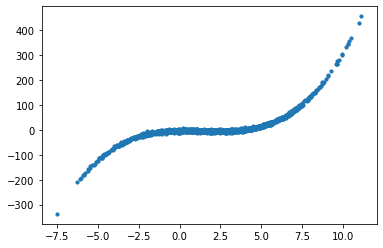

In [89]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 2000)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 2000)
plt.scatter(x,y, s=10)
plt.show()

In [90]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [91]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x,y)

DecisionTreeRegressor(max_depth=2)

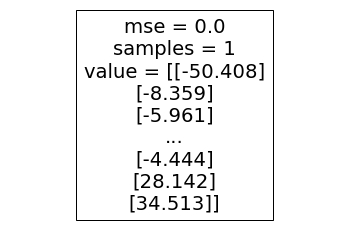

In [70]:
tree.plot_tree(tree_reg);

In [92]:
y_preds = tree_reg.predict(x)

In [93]:
from sklearn.metrics import mean_squared_error

mse_reg_tree = mean_squared_error(y, y_preds)

In [94]:
np.sqrt(mse_reg_tree)

19.815637425126354

In [105]:
tree_reg_2 = DecisionTreeRegressor(max_depth=100)
tree_reg_2.fit(x,y)

DecisionTreeRegressor(max_depth=100)

In [107]:
y_preds_2 = tree_reg_2.predict(x)
mse_reg_tree = mean_squared_error(y, y_preds_2)
np.sqrt(mse_reg_tree)

0.0

In [109]:
from sklearn.model_selection import cross_val_score

In [116]:
cv = cross_val_score(tree_reg_2, x, y, scoring="neg_mean_squared_error", n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [119]:
np.mean(np.sqrt(-cv))

5.239181503101174

In [131]:
from sklearn.datasets import make_moons

X, y = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=None)

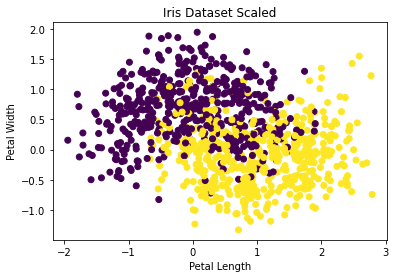

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=y);
plt.title("Iris Dataset Scaled")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [138]:
tree_clf_moon = DecisionTreeClassifier()
tree_clf_moon.fit(X_train, y_train)

DecisionTreeClassifier()

In [139]:
tree_clf.score(X_train, y_train)

0.34125

In [142]:
cv_moon = cross_val_score(tree_clf_moon, X_train, y_train, cv=5, n_jobs=-1, verbose=1, scoring="f1")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [144]:
np.mean(cv_moon)

0.8037054839163769

In [159]:
grid = {
       "max_depth": [2,4,6,8],
       "max_features": [1,2,4,6,8],
       "min_samples_split": [2,4,6,8],
       "min_samples_leaf": [2,4,6,8],
       "max_leaf_nodes":[2,4,6,8]}

In [160]:
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(tree_clf, grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1, random_state=42)
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': [1, 2, 4, 6, 8],
                                        'max_leaf_nodes': [2, 4, 6, 8],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 8]},
                   random_state=42, scoring='accuracy', verbose=1)

In [163]:
random_cv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 4,
 'max_features': 2,
 'max_depth': 8}

In [166]:
new_tree = random_cv.best_estimator_

In [168]:
random_cv.score(X_train, y_train)

0.865

In [171]:
cv_moon = cross_val_score(new_tree, X_train, y_train, cv=5, verbose=1, n_jobs=-1, scoring="accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [172]:
cv_moon

array([0.90625, 0.8625 , 0.83125, 0.825  , 0.79375])

In [173]:
np.mean(cv_moon)

0.84375

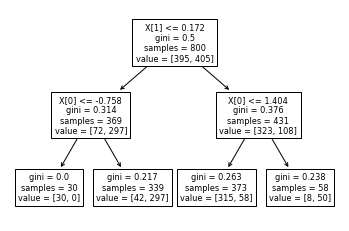

In [175]:
tree.plot_tree(new_tree);

In [272]:
X_1, y_1 = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)
X_2, y_2 = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)
X_3, y_3 = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)
X_4, y_4 = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)
X_5, y_5 = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)
X_6, y_6 = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)
X_7, y_7 = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)

In [273]:
new_tree1 = new_tree
new_tree2 = new_tree
new_tree3 = new_tree
new_tree4 = new_tree
new_tree5 = new_tree
new_tree6 = new_tree
new_tree7 = new_tree

In [278]:
random.seed(42)

new_tree1.fit(X_1, y_1)
new_tree2.fit(X_2, y_2)
new_tree3.fit(X_3, y_3)
new_tree4.fit(X_4, y_4)
new_tree5.fit(X_5, y_5)
new_tree6.fit(X_6, y_6)
new_tree7.fit(X_7, y_7)

DecisionTreeClassifier(max_depth=8, max_features=2, max_leaf_nodes=4,
                       min_samples_leaf=4)

In [279]:
score = (new_tree1.score(X_1,y_1),new_tree2.score(X_2,y_2), new_tree3.score(X_3,y_3), new_tree4.score(X_4,y_4), new_tree5.score(X_5,y_5),
new_tree6.score(X_6,y_6), new_tree7.score(X_7,y_7))

In [280]:
score

(0.867, 0.867, 0.867, 0.867, 0.867, 0.867, 0.867)

In [281]:
np.mean(score)

0.867

In [290]:
new_tree2.predict([X_test[110]])

array([0], dtype=int32)

In [291]:
y_test[0]

0